<a href="https://colab.research.google.com/github/khanghoang2351-design/AI-Final/blob/main/Train2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# --- 1. Kết nối Drive và Định nghĩa đường dẫn ---
drive.mount('/content/drive')

# Đảm bảo đường dẫn này đúng
G_DRIVE_PATH = '/content/drive/MyDrive'

BASE_PATH = os.path.join(G_DRIVE_PATH, 'dataset_split')
TEST_PATH = os.path.join(BASE_PATH, 'test')

# --- 2. Định nghĩa lại các Tham số Cấu hình ---
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 11 # Số món ăn

# --- 3. Tạo lại Test Generator ---
# Rất quan trọng: phải dùng CÙNG MỘT HÀM preprocess_input
# mà chúng ta đã dùng để huấn luyện
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Tắt xáo trộn để đánh giá
)

print("--- Đã tải xong Test Generator ---")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 703 images belonging to 11 classes.
--- Đã tải xong Test Generator ---


In [ ]:
from tensorflow.keras.models import load_model

# --- 1. Tải mô hình đã huấn luyện ---
model_path = os.path.join(G_DRIVE_PATH, "food_classifier_best.h5")
print(f"Đang tải mô hình từ: {model_path}")

model = load_model(model_path)

print("--- Tải mô hình thành công ---")
model.summary() # In lại cấu trúc để kiểm tra

# --- 2. Đánh giá mô hình trên tập Test ---
print("\n--- Bắt đầu đánh giá trên tập Test ---")

# Hàm evaluate sẽ chạy mô hình trên toàn bộ tập test
# và trả về (loss, accuracy)
results = model.evaluate(test_generator)

print("\n--- KẾT QUẢ ĐÁNH GIÁ CUỐI CÙNG ---")
print(f"Test Loss (Mất mát): {results[0]:.4f}")
print(f"Test Accuracy (Độ chính xác): {results[1] * 100:.2f}%")

Đang tải mô hình từ: /content/drive/MyDrive/food_classifier_best.h5


--- Tải mô hình thành công ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,272,077 (8.67 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)


--- Bắt đầu đánh giá trên tập Test ---
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9633 - loss: 0.0910

--- KẾT QUẢ ĐÁNH GIÁ CUỐI CÙNG ---
Test Loss (Mất mát): 0.1437
Test Accuracy (Độ chính xác): 94.17%


In [ ]:
# --- 1. Tải lại các thư viện và generator cần thiết ---
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# --- 2. Định nghĩa lại đường dẫn Train/Val ---
# (Biến BASE_PATH đã có từ ô code trước)
TRAIN_PATH = os.path.join(BASE_PATH, 'train')
VAL_PATH = os.path.join(BASE_PATH, 'val')

# --- 3. Tạo lại Train/Val Generators ---
print("--- Đang tạo lại Train/Val Generators ---")

# Tạo lại công cụ Tăng cường dữ liệu cho tập Train
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Tạo lại công cụ cho tập Validation
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Tạo lại dòng chảy dữ liệu
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print(f"Tìm thấy {train_generator.samples} ảnh train.")
print(f"Tìm thấy {validation_generator.samples} ảnh val.")
print("--- Sẵn sàng để Tinh chỉnh (Fine-Tuning) ---")

--- Đang tạo lại Train/Val Generators ---
Found 4866 images belonging to 11 classes.
Found 1388 images belonging to 11 classes.
Tìm thấy 4866 ảnh train.
Tìm thấy 1388 ảnh val.
--- Sẵn sàng để Tinh chỉnh (Fine-Tuning) ---


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# --- 1. Rã đông (Unfreeze) mô hình ---
# Biến 'model' đã được tải ở ô code trước
model.trainable = True

# --- 2. Biên dịch lại (Re-compile) với Learning Rate RẤT THẤP ---
# Đây là chìa khóa của Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5), # Cực kỳ thấp: 0.00001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("--- Đã rã đông và biên dịch lại mô hình ---")
model.summary() # sẽ thấy 'Trainable params' giờ rất lớn

# --- 3. Chuẩn bị Checkpoint MỚI cho mô hình Tinh chỉnh ---
# Chúng ta sẽ lưu mô hình tốt nhất MỚI vào file khác
finetune_checkpoint_path = os.path.join(G_DRIVE_PATH, "food_classifier_FINETUNED_best.h5")

finetune_checkpoint_callback = ModelCheckpoint(
    filepath=finetune_checkpoint_path,
    monitor='val_accuracy', # Vẫn theo dõi val_accuracy
    save_best_only=True,
    mode='max',
    verbose=1
)

# --- 4. Huấn luyện Tinh chỉnh ---
print("\n--- Bắt đầu Huấn luyện Giai đoạn 2 (Fine-Tuning) ---")

# Chúng ta chỉ huấn luyện thêm 10-15 epochs
FINE_TUNE_EPOCHS = 15

history_finetune = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=validation_generator,
    callbacks=[finetune_checkpoint_callback]
)

print("\n--- Huấn luyện Tinh chỉnh Hoàn tất ---")
print(f"Mô hình Tinh chỉnh tốt nhất đã được lưu tại: {finetune_checkpoint_path}")

--- Đã rã đông và biên dịch lại mô hình ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,272,075 (8.67 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


--- Bắt đầu Huấn luyện Giai đoạn 2 (Fine-Tuning) ---
Epoch 1/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.9381 - loss: 0.1728 
Epoch 1: val_accuracy improved from -inf to 0.95749, saving model to /content/drive/MyDrive/food_classifier_FINETUNED_best.h5


153/153 ━━━━━━━━━━━━━━━━━━━━ 4439s 29s/step - accuracy: 0.9381 - loss: 0.1729 - val_accuracy: 0.9575 - val_loss: 0.1165
Epoch 2/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9401 - loss: 0.1570
Epoch 2: val_accuracy improved from 0.95749 to 0.95965, saving model to /content/drive/MyDrive/food_classifier_FINETUNED_best.h5


153/153 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.9401 - loss: 0.1571 - val_accuracy: 0.9597 - val_loss: 0.1145
Epoch 3/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9412 - loss: 0.1593
Epoch 3: val_accuracy did not improve from 0.95965
153/153 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.9412 - loss: 0.1594 - val_accuracy: 0.9582 - val_loss: 0.1140
Epoch 4/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9349 - loss: 0.1777
Epoch 4: val_accuracy did not improve from 0.95965
153/153 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.9349 - loss: 0.1776 - val_accuracy: 0.9575 - val_loss: 0.1129
Epoch 5/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9379 - loss: 0.1643
Epoch 5: val_accuracy did not improve from 0.95965
153/153 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.9379 - loss: 0.1642 - val_accuracy: 0.9575 - val_loss: 0.1127
Epoch 6/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9414 - loss: 0.1609
Epoch 6: val_accuracy did not impro

In [ ]:
from tensorflow.keras.models import load_model

# --- 1. Tải mô hình đã Tinh chỉnh (Fine-Tuned) ---
# (Biến G_DRIVE_PATH vẫn tồn tại từ các ô trước)
finetune_model_path = os.path.join(G_DRIVE_PATH, "food_classifier_FINETUNED_best.h5")

print(f"Đang tải mô hình đã tinh chỉnh từ: {finetune_model_path}")

# Tải mô hình mới
# (Lưu ý: biến 'test_generator' vẫn đang tồn tại trong Colab)
finetuned_model = load_model(finetune_model_path)

print("--- Tải mô hình Tinh chỉnh thành công ---")

# --- 2. Đánh giá mô hình mới ---
print("\n--- Bắt đầu đánh giá mô hình Tinh chỉnh trên tập Test ---")

# Hàm evaluate sẽ chạy mô hình MỚI trên toàn bộ tập test
results_finetune = finetuned_model.evaluate(test_generator)

print("\n--- KẾT QUẢ ĐÁNH GIÁ (SAU KHI TINH CHỈNH) ---")
print(f"Test Loss (Mất mát): {results_finetune[0]:.4f}")
print(f"Test Accuracy (Độ chính xác): {results_finetune[1] * 100:.2f}%")

Đang tải mô hình đã tinh chỉnh từ: /content/drive/MyDrive/food_classifier_FINETUNED_best.h5


--- Tải mô hình Tinh chỉnh thành công ---

--- Bắt đầu đánh giá mô hình Tinh chỉnh trên tập Test ---
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9631 - loss: 0.0938

--- KẾT QUẢ ĐÁNH GIÁ (SAU KHI TINH CHỈNH) ---
Test Loss (Mất mát): 0.1404
Test Accuracy (Độ chính xác): 94.17%


--- Đang kết nối Drive và tải ảnh mẫu ---
Mounted at /content/drive
--- Ảnh tải thành công. Bắt đầu cắt... ---


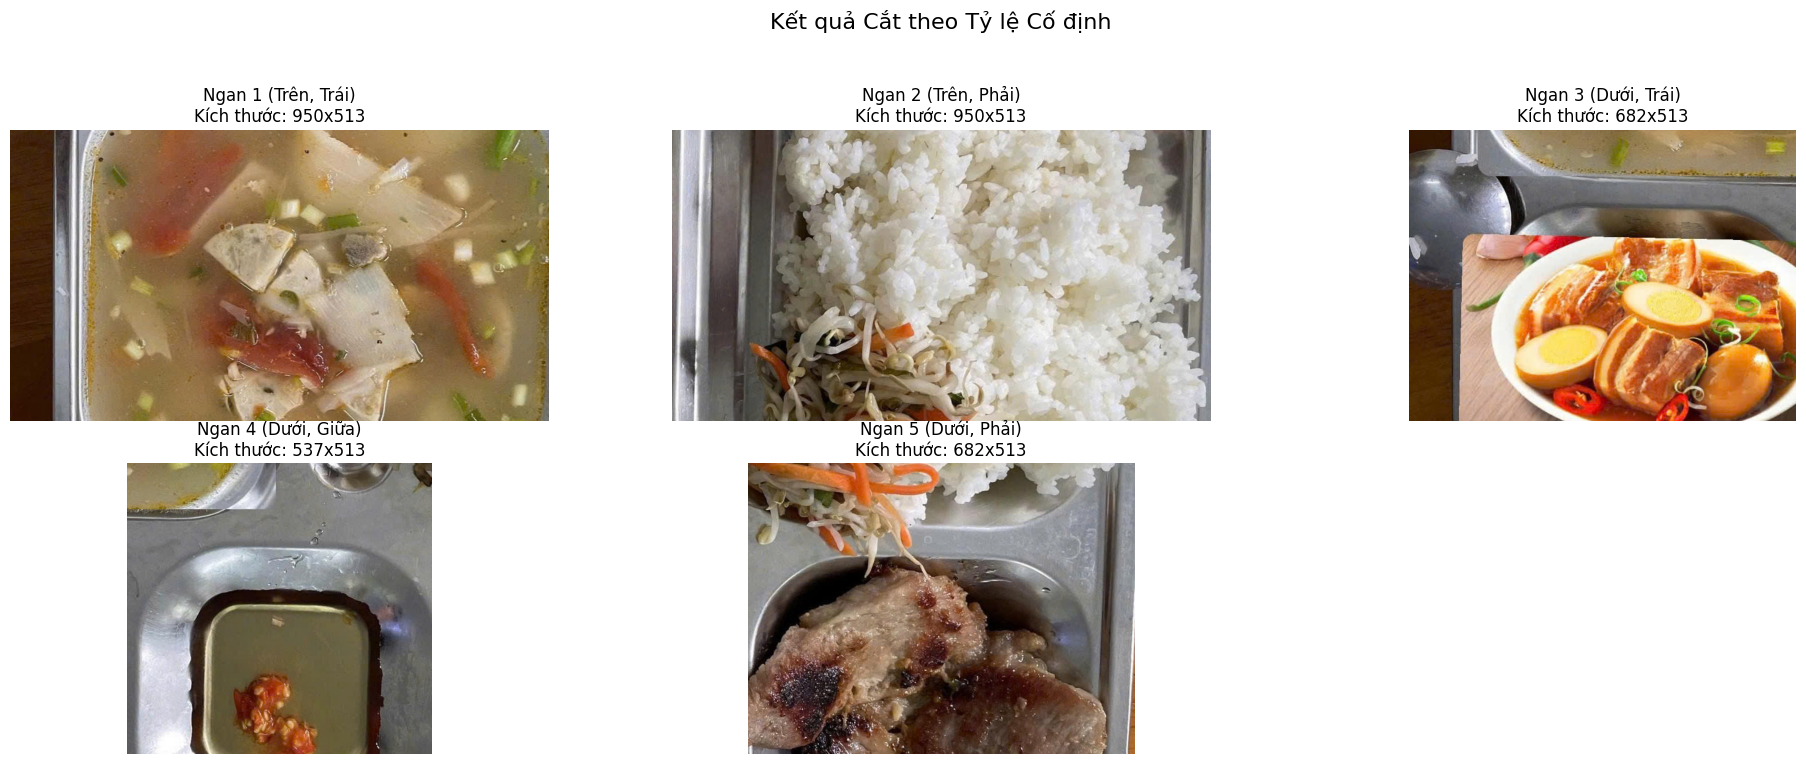

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
from collections import OrderedDict

# --- 1. Hàm cắt khay cơm (Layout: 2 trên, 3 dưới) ---
def crop_tray_layout_2_3(image):
    """
    Cắt ảnh khay cơm theo layout 2 ngăn trên, 3 ngăn dưới
    dựa trên tỷ lệ phần trăm cố định.

    Returns:
        OrderedDict: Một dictionary chứa tên ngăn và ảnh đã cắt (dạng_ảnh OpenCV).
    """

    # Lấy kích thước ảnh gốc
    (h, w) = image.shape[:2]

    # --- Định nghĩa Tọa độ Tỷ lệ % ---
    # Đây là các con số tôi đã tinh chỉnh dựa trên bố cục ảnh mẫu
    # (y_start, y_end, x_start, x_end)

    # Hàng trên
    y_top_start = int(h * 0.04) # 4% từ đỉnh
    y_top_end = int(h * 0.48)   # 48% từ đỉnh

    # Hàng dưới
    y_bottom_start = int(h * 0.52) # 52% từ đỉnh
    y_bottom_end = int(h * 0.96)   # 96% từ đỉnh

    # Cột
    x_left_start = int(w * 0.02)
    x_left_end = int(w * 0.48)

    x_mid_start = int(w * 0.37) # Của ngăn giữa (hàng dưới)
    x_mid_end = int(w * 0.63)

    x_right_start = int(w * 0.52)
    x_right_end = int(w * 0.98)

    x_bottom_left_end = int(w * 0.35) # Của ngăn trái (hàng dưới)
    x_bottom_right_start = int(w * 0.65)

    # --- Cắt 5 vùng ảnh ---
    # Lưu ý: Cú pháp_Numpy là [y_start:y_end, x_start:x_end]

    crop_top_left = image[y_top_start:y_top_end, x_left_start:x_left_end]
    crop_top_right = image[y_top_start:y_top_end, x_right_start:x_right_end]

    crop_bottom_left = image[y_bottom_start:y_bottom_end, x_left_start:x_bottom_left_end]
    crop_bottom_mid = image[y_bottom_start:y_bottom_end, x_mid_start:x_mid_end]
    crop_bottom_right = image[y_bottom_start:y_bottom_end, x_bottom_right_start:x_right_end]

    # Sắp xếp vào Dictionary để đảm bảo thứ tự
    # Thứ tự này sẽ cố định: 1-2 (trên), 3-4-5 (dưới)
    cropped_regions = OrderedDict([
        ("Ngan 1 (Trên, Trái)", crop_top_left),
        ("Ngan 2 (Trên, Phải)", crop_top_right),
        ("Ngan 3 (Dưới, Trái)", crop_bottom_left),
        ("Ngan 4 (Dưới, Giữa)", crop_bottom_mid),
        ("Ngan 5 (Dưới, Phải)", crop_bottom_right)
    ])

    return cropped_regions

# --- 2. Kết nối Drive và Tải ảnh mẫu ---
print("--- Đang kết nối Drive và tải ảnh mẫu ---")
try:
    drive.mount('/content/drive', force_remount=True)
except Exception as e:
    pass # Bỏ qua nếu đã mount

G_DRIVE_PATH = '/content/drive/MyDrive'
IMAGE_PATH = os.path.join(G_DRIVE_PATH, "khaycommau.jpg")
image = cv2.imread(IMAGE_PATH)

if image is None:
    print("!!! LỖI: Không thể tải ảnh 'khaycommau.jpg'")
else:
    print("--- Ảnh tải thành công. Bắt đầu cắt... ---")

    # --- 3. Gọi hàm Cắt ---
    cropped_images_dict = crop_tray_layout_2_3(image)

    # --- 4. Hiển thị kết quả ---
    plt.figure(figsize=(20, 8))
    plt.suptitle("Kết quả Cắt theo Tỷ lệ Cố định", fontsize=16)

    for i, (name, crop_img) in enumerate(cropped_images_dict.items()):
        plt.subplot(2, 3, i + 1) # Vẽ trên lưới 2x3
        plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
        plt.title(f"{name}\nKích thước: {crop_img.shape[1]}x{crop_img.shape[0]}")
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
import json
import os
from google.colab import drive

# --- 1. Kết nối Drive (nếu chưa) ---
try:
    drive.mount('/content/drive', force_remount=True)
except Exception as e:
    pass # Bỏ qua nếu đã mount

# Đường dẫn G_DRIVE_PATH đã có từ trước
G_DRIVE_PATH = '/content/drive/MyDrive'

# --- 2. Định nghĩa Menu ---
# Dựa trên file PDF và 11 lớp đã huấn luyện
# QUAN TRỌNG: Tên món ăn phải TRÙNG KHỚP 100% với tên thư mục
menu_data = {
    "Cơm trắng": 10000,
    "Đậu hủ sốt cà": 25000, # PDF ghi "Đậu hũ sốt cà", thư mục là "Đậu hủ sốt cà" -> OK
    "Cá hú kho": 30000,
    "Thịt kho trứng": 30000,
    "Thịt kho": 25000,
    "canh chua có cá": 25000, # PDF ghi "Canh chua có cá", thư mục là "canh chua có cá" -> OK
    "canh chua không cá": 10000, # PDF "Canh chua không cá", thư mục "canh chua không cá" -> OK
    "Sườn nướng": 30000,
    "Canh rau": 7000,
    "Rau xào": 10000,
    "Trứng chiên": 25000
}

# --- 3. Lưu file menu.json ---
menu_file_path = os.path.join(G_DRIVE_PATH, "menu.json")

with open(menu_file_path, 'w', encoding='utf-8') as f:
    # ensure_ascii=False để lưu tiếng Việt có dấu
    json.dump(menu_data, f, ensure_ascii=False, indent=4)

print(f"--- Đã tạo và lưu menu thành công tại: {menu_file_path} ---")
print(json.dumps(menu_data, ensure_ascii=False, indent=2))

Mounted at /content/drive
--- Đã tạo và lưu menu thành công tại: /content/drive/MyDrive/menu.json ---
{
  "Cơm trắng": 10000,
  "Đậu hủ sốt cà": 25000,
  "Cá hú kho": 30000,
  "Thịt kho trứng": 30000,
  "Thịt kho": 25000,
  "canh chua có cá": 25000,
  "canh chua không cá": 10000,
  "Sườn nướng": 30000,
  "Canh rau": 7000,
  "Rau xào": 10000,
  "Trứng chiên": 25000
}


In [ ]:
# (Code này chạy tiếp trong Colab)

def calculate_bill(food_list, menu_data):
    """
    Tính hóa đơn dựa trên danh sách món ăn và menu.
    """
    bill_details = []
    total_price = 0

    # Đếm số lượng mỗi món
    food_counts = {}
    for food in food_list:
        food_counts[food] = food_counts.get(food, 0) + 1

    # Tạo hóa đơn
    for food, quantity in food_counts.items():
        if food in menu_data:
            price_per_item = menu_data[food]
            total_item_price = price_per_item * quantity
            total_price += total_item_price

            bill_details.append({
                "mon_an": food,
                "so_luong": quantity,
                "don_gia": price_per_item,
                "thanh_tien": total_item_price
            })
        else:
            # Xử lý trường hợp không tìm thấy món (ví dụ: "Ngan trong")
            bill_details.append({
                "mon_an": food,
                "so_luong": quantity,
                "don_gia": 0,
                "thanh_tien": 0
            })

    return total_price, bill_details

# --- Thử nghiệm hàm tính tiền ---
print("\n--- Thử nghiệm hàm tính tiền ---")
test_food_list = ["Cơm trắng", "Sườn nướng", "Canh rau", "Sườn nướng", "Đậu hủ sốt cà"]
total, details = calculate_bill(test_food_list, menu_data)

print(f"Danh sách món ăn: {test_food_list}")
print("Chi tiết hóa đơn:")
for item in details:
    print(f"  - {item['mon_an']} (SL: {item['so_luong']}): {item['thanh_tien']:,} VND")
print(f"Tổng cộng: {total:,} VND")


--- Thử nghiệm hàm tính tiền ---
Danh sách món ăn: ['Cơm trắng', 'Sườn nướng', 'Canh rau', 'Sườn nướng', 'Đậu hủ sốt cà']
Chi tiết hóa đơn:
  - Cơm trắng (SL: 1): 10,000 VND
  - Sườn nướng (SL: 2): 60,000 VND
  - Canh rau (SL: 1): 7,000 VND
  - Đậu hủ sốt cà (SL: 1): 25,000 VND
Tổng cộng: 102,000 VND
